In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['professionals.csv', 'tag_users.csv', 'students.csv', 'tag_questions.csv', 'groups.csv', 'emails.csv', 'group_memberships.csv', 'answers.csv', 'comments.csv', 'matches.csv', 'tags.csv', 'questions.csv', 'school_memberships.csv']


## Objective
To Recommend Question from User to Some Answerers
- Two kinda role
  - Professionals with tags(topic)
  - Students with tags(topic)
- Three kinda text data
  - questions
  - answers
    - comments: Our favorite comments tend to have "Thank you" in them :)

- Input: Question_User_Tags & Comment(Title&Body) -> Topic Model
- Output: Answer_User

質問者と回答者
Top 20人にE-mail送信
    
1. カテゴリーマッチング
    - 回答者をカテゴリーに分けておく
    - コメント（タイトルとボディ）をまずカテゴリーに分類
2. 

In [6]:
prof = pd.read_csv('../input/professionals.csv')
prof.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [7]:
usertag = pd.read_csv('../input/tag_users.csv')
usertag.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [8]:
student = pd.read_csv('../input/students.csv')
student.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00 UTC+0000
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00 UTC+0000


In [11]:
email = pd.read_csv('../input/emails.csv')
email.head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily
4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40 UTC+0000,email_notification_daily


In [12]:
memb = pd.read_csv('../input/group_memberships.csv')
memb.head()

,group_memberships_group_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab
4,eabbdf4029734c848a9da20779637d03,299da113c5d1420ab525106c242c9429


In [13]:
ans = pd.read_csv('../input/answers.csv')
ans.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


In [14]:
comment = pd.read_csv('../input/comments.csv')
comment.head()

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40 UTC+0000,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47 UTC+0000,Most large universities offer study abroad pro...
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04 UTC+0000,"First, I want to put you at ease that the oppo..."
3,73a6223948714c5da6231937157e4cb7,d02f6d9faac24997a7003a59e5f34bd3,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 17:53:28 UTC+0000,Your question submission was great! I just wan...
4,55a89a9061d44dd19569c45f90a22779,e78f75c543e84e1c94da1801d8560f65,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 14:51:53 UTC+0000,Thank you. I'm new to this site. I'm sorry if ...


In [15]:
match = pd.read_csv('../input/matches.csv')
match.head()

,matches_email_id,matches_question_id
0,1721939,332a511f1569444485cf7a7a556a5e54
1,1665388,332a511f1569444485cf7a7a556a5e54
2,1636634,332a511f1569444485cf7a7a556a5e54
3,1635498,332a511f1569444485cf7a7a556a5e54
4,1620298,332a511f1569444485cf7a7a556a5e54


In [17]:
questions = pd.read_csv('../input/questions.csv')
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [19]:
school_membership = pd.read_csv('../input/school_memberships.csv')
school_membership.head()

,school_memberships_school_id,school_memberships_user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116
4,182063,9c5803ae43ca4cf6b27ea85871625116


In [22]:
ans.columns

Index(['answers_id', 'answers_author_id', 'answers_question_id',
       'answers_date_added', 'answers_body'],
      dtype='object')

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

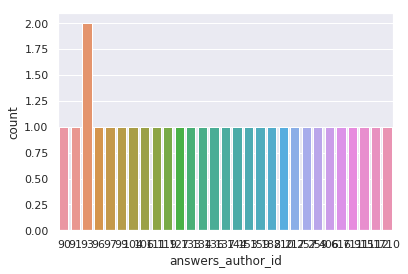

In [40]:
ax = sns.countplot(x=ans['answers_author_id'].value_counts()[:30])

In [33]:
len(ans['answers_author_id'].value_counts())

10169

In [31]:
ans['answers_author_id'].value_counts()[:20]

36ff3b3666df400f956f8335cf53e09e    1710
58fa5e95fe9e480a9349bbb1d7faaddb    1112
a1006e6a58a0447592e2435caa230f78     915
be5d23056fcb4f1287c823beec5291e1     711
05ab77d4c6a141b999044ebbf5415b0d     616
369f1c8646b649f6997eae7809696bd5     406
a6d33c38902546849c36ea7e9e9f0870     259
05444a2f42454327b2ac4b463c0adbe0     257
4dc61581ec7b409bbd037e483f53ba0a     217
c3b4e11154f74a858779be7ba9b6f00c     210
e1d39b665987455fbcfbec3fc6df6056     188
fafeba89ca764bd891862fb8440a2962     159
81a594b683d54e6dbb4b04ea00a5e25b     153
704f599b85354ca4a79ca3847f585ec8     144
d67ce930870945109a7ad86d29ba2035     137
fe4543418c0846e5a65fa22b4ad9a304     136
53939a491acb42a4815463845a638186     134
e2b4c84bf1ca4aea9b108869692d8017     133
0b17f4e9d93c40eb9a5d087865084ce6     127
bb4fe08bb5424f08972927d90bad9642     119
Name: answers_author_id, dtype: int64

In [29]:
len(ans)

51123

手順
    
回答者ランクの付け方は？ 50vs50で
TOP100人にレコメンド

仕込み：Answer_User_id, Answered_question_docs, Positive_num（回数）, Active_class（1,2,3,4,5）, 合計Answer_Rank
入力：質問のタイトル、ボディ、タグをシーケンス化
Doc2vecとコサイン類似度で過去の文章と似ているものにコメントしたTOP500人のユーザーを選出.

